In [2]:
import pandas as pd
import numpy as np

In [3]:
X_train = pd.read_csv("../Xtrain_hgcGIrA.csv")
Y_train = pd.read_csv("../Ytrain_yL5OjS4.csv")

X_test = pd.read_csv("../Xtest.csv")
Y_test = pd.read_csv("../Ysample_iX1anNa.csv")

In [4]:
X_train.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


In [5]:
X_train['train'].nunique()

55

In [6]:
X_train['station'].nunique()

36

In [7]:
print("Shape of Xtrain :" + str(X_train.shape))
print("Shape of Ytrain :" + str(Y_train.shape))

print("Shape of Xtest :" + str(X_test.shape))
print("Shape of Ytest :" + str(Y_test.shape))


Shape of Xtrain :(31119, 12)
Shape of Ytrain :(31119, 2)
Shape of Xtest :(13752, 12)
Shape of Ytest :(13752, 2)


In [8]:
X = pd.concat([X_train, X_test], axis=0)
X.reset_index(drop=True, inplace=True)



In [9]:
X

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9,0,BE,08:00:00,2,0.121,0.145,0.15715,0.071,0.095,NaN
44867,2019-07-04,9,0,BE,08:00:00,2,0.144,0.139,0.15300,0.079,0.102,NaN
44868,2019-07-05,9,0,BE,08:00:00,2,0.128,0.137,0.12700,0.072,0.089,NaN
44869,2019-05-28,9,0,BE,08:00:00,2,0.164,0.187,0.15500,0.100,0.130,NaN


In [10]:
X['way'].value_counts()

way
0    44871
Name: count, dtype: int64

In [11]:
X['composition'].value_counts()

composition
2    44860
1       11
Name: count, dtype: int64

In [12]:
X['hour'].value_counts()

hour
07:00:00    14647
08:00:00    14398
06:00:00     7117
09:00:00     4097
11:00:00        2
Name: count, dtype: int64

In [13]:
def transform2(X):

    columns_to_delete = ['way', 'composition','date']
    X = X.drop(columns=columns_to_delete, axis=1)
    #X['date'] = pd.to_datetime(X['date'], format='%Y-%m-%d')
    X['hour'] = pd.to_datetime(X['hour']).dt.hour
    X = pd.get_dummies(X, columns=["station"])
    X = pd.get_dummies(X, columns=["train"])
    #X=X.drop(["train","station"], axis=1)
    return X

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0)
data = transform2(X)
columns = data[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3','hour']].columns.tolist()
data[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3','hour']] = pd.DataFrame(imputer.fit_transform(data[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3','hour']]), columns=columns)

data.head()


C:\Users\khaba\AppData\Local\Temp\ipykernel_12452\2702032697.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['hour'] = pd.to_datetime(X['hour']).dt.hour
c:\Users\khaba\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,station_AA,station_AB,station_AC,...,train_46,train_47,train_48,train_49,train_50,train_51,train_52,train_53,train_54,train_55
0,6.0,0.114336,0.129463,0.189309,0.201,0.138,0.091,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.0,0.120097,0.134503,0.194256,0.204,0.152,0.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.0,0.121557,0.135827,0.198459,0.213,0.153,0.111,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6.0,0.121736,0.135562,0.197872,0.213,0.152,0.108,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6.0,0.121063,0.133755,0.194326,0.210,0.147,0.096,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
X = data
X.head()


,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,station_AA,station_AB,station_AC,...,train_46,train_47,train_48,train_49,train_50,train_51,train_52,train_53,train_54,train_55
0,6.0,0.114336,0.129463,0.189309,0.201,0.138,0.091,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.0,0.120097,0.134503,0.194256,0.204,0.152,0.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.0,0.121557,0.135827,0.198459,0.213,0.153,0.111,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6.0,0.121736,0.135562,0.197872,0.213,0.152,0.108,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6.0,0.121063,0.133755,0.194326,0.210,0.147,0.096,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
X['hour'].unique()

array([6.        , 7.        , 7.3480383 , ..., 6.76609892, 6.8425514 ,
       6.82094137])

In [17]:
conditions = [
    (X['hour'] <= 6.5),
    (X['hour'] > 6.5) & (X['hour'] <= 7.5),
    (X['hour'] > 7.5) & (X['hour'] <= 8.5),
    (X['hour'] > 8.5) & (X['hour'] <= 9.5),
    (X['hour'] >= 11),
]

choices = [6, 7, 8, 9, 11]  # Les valeurs à assigner en fonction des conditions

X['hour'] = np.select(conditions, choices, default=X['hour'])

In [18]:
X['hour'].unique()

array([ 6.,  7.,  8.,  9., 11.])

In [19]:
X.replace(False, 0, inplace=True)
X.replace(True, 1, inplace=True)
X

,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,station_AA,station_AB,station_AC,...,train_46,train_47,train_48,train_49,train_50,train_51,train_52,train_53,train_54,train_55
0,6.0,0.114336,0.129463,0.189309,0.201,0.138,0.091000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.0,0.120097,0.134503,0.194256,0.204,0.152,0.106000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,0.121557,0.135827,0.198459,0.213,0.153,0.111000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,0.121736,0.135562,0.197872,0.213,0.152,0.108000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0.121063,0.133755,0.194326,0.210,0.147,0.096000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44866,8.0,0.121000,0.145000,0.157150,0.071,0.095,0.098115,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44867,8.0,0.144000,0.139000,0.153000,0.079,0.102,0.100234,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44868,8.0,0.128000,0.137000,0.127000,0.072,0.089,0.088278,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44869,8.0,0.164000,0.187000,0.155000,0.100,0.130,0.119525,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X['train_46'].unique()

array([0, 1], dtype=int64)

In [21]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

hour          0.0
train_28      0.0
train_27      0.0
train_26      0.0
train_25      0.0
             ... 
station_AV    0.0
station_AU    0.0
station_AT    0.0
station_AR    0.0
train_55      0.0
Length: 98, dtype: float64

In [22]:
X_train = X.head(31119)
X_test = X.tail(len(X) - 31119)

In [23]:
X_train

,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,station_AA,station_AB,station_AC,...,train_46,train_47,train_48,train_49,train_50,train_51,train_52,train_53,train_54,train_55
0,6.0,0.114336,0.129463,0.189309,0.201,0.138,0.091000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.0,0.120097,0.134503,0.194256,0.204,0.152,0.106000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,0.121557,0.135827,0.198459,0.213,0.153,0.111000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,0.121736,0.135562,0.197872,0.213,0.152,0.108000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0.121063,0.133755,0.194326,0.210,0.147,0.096000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31114,8.0,0.152000,0.188600,0.157000,0.080,0.100,0.096595,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31115,8.0,0.153000,0.180400,0.191000,0.089,0.121,0.118668,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31116,8.0,0.166000,0.149000,0.168000,0.099,0.129,0.121151,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31117,8.0,0.182000,0.193000,0.162000,0.074,0.101,0.094082,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_test

,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,station_AA,station_AB,station_AC,...,train_46,train_47,train_48,train_49,train_50,train_51,train_52,train_53,train_54,train_55
31119,6.0,0.127885,0.141309,0.207184,0.226,0.165,0.128000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31120,6.0,0.126623,0.138951,0.202482,0.221,0.159,0.114000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31121,6.0,0.133316,0.144968,0.209376,0.227,0.175,0.133000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31122,6.0,0.116766,0.132552,0.192224,0.200,0.148,0.105000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31123,6.0,0.129856,0.142236,0.205439,0.221,0.169,0.126000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44866,8.0,0.121000,0.145000,0.157150,0.071,0.095,0.098115,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44867,8.0,0.144000,0.139000,0.153000,0.079,0.102,0.100234,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44868,8.0,0.128000,0.137000,0.127000,0.072,0.089,0.088278,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44869,8.0,0.164000,0.187000,0.155000,0.100,0.130,0.119525,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
Y_train

,Unnamed: 0,p0q0
0,1,0.216
1,2,0.216
2,3,0.227
3,4,0.229
4,5,0.225
...,...,...
31114,31115,0.111
31115,31116,0.143
31116,31117,0.139
31117,31118,0.117


In [26]:
Y_train = Y_train.drop(["Unnamed: 0"], axis=1)
Y_test = Y_test.drop(["Unnamed: 0"], axis=1)

In [27]:
import torch.nn as nn
import torch as tch
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [28]:
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [29]:
Y_train.dtypes

p0q0    float32
dtype: object

In [30]:
X_train.shape

(31119, 98)

In [31]:
X_train = tch.from_numpy(X_train.values)
x_test = tch.from_numpy(X_test.values)
Y_train = tch.from_numpy(Y_train.values).reshape(-1,1)
y_test = tch.from_numpy(Y_test.values).reshape(-1,1)

In [32]:
from NN import NeuralNetwork
from TF import evaluate_model, train_network

In [33]:
num_epochs = 500
batch_size = 128
loss_function = nn.MSELoss()

In [34]:
weight_decay = 0.0 #set to 0; no L2 Regularizer; passed into the Optimizer
lambda_L1=0.0 #Set to 0; no L1 reg; manually added in loss (train_network)

In [35]:
model = NeuralNetwork()

In [36]:
adam_optimizer = tch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [37]:
adam_loss = train_network(model, adam_optimizer, loss_function ,num_epochs,batch_size, X_train,Y_train,lambda_L1=0.0)

Epoch: 0 - Loss:0.0248
Epoch: 100 - Loss:0.0008
Epoch: 200 - Loss:0.0006
Epoch: 300 - Loss:0.0006
Epoch: 400 - Loss:0.0005


In [38]:
import matplotlib.pyplot as plt

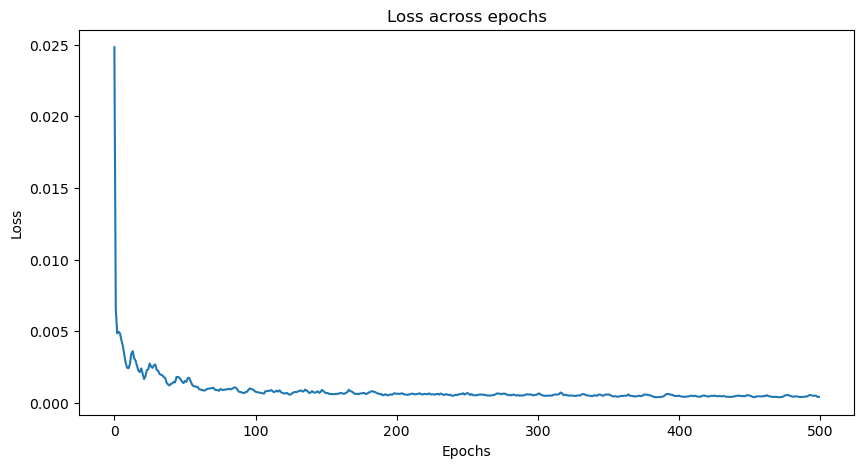

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [40]:
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)


 Model Performance -


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [41]:
with tch.no_grad():
    predictions = model(x_test)

print(predictions)

tensor([[0.2388],
        [0.2298],
        [0.2451],
        ...,
        [0.1080],
        [0.1467],
        [0.1131]])
